In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# 1- All the data must be in numeric format. (Necessary)
# 2- All the numeric data must be scaled/normalized (Necessary)
# 3- Similarity within the same cluster should be high.
# 4- Similarity among the other clusters should be low.
# https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [2]:
df = pd.read_csv('marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape #2240 rows, 29 columns

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## Exploratory Data Analysis (EDA)

### 1-EDA for Numerical Features

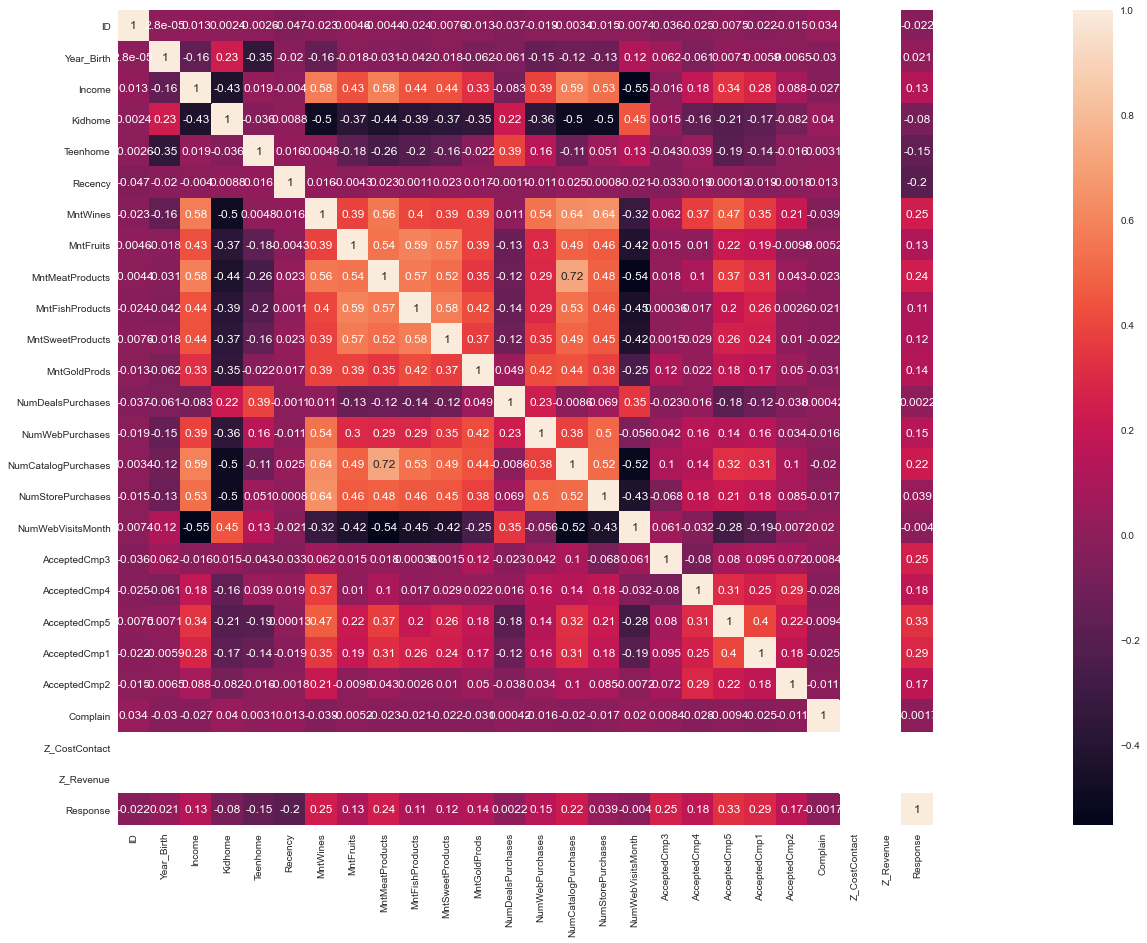

In [6]:
correlation_matrix = df.corr()
plt.subplots(figsize=(50,15))
sns.heatmap(data = correlation_matrix, annot=True, square=True, fmt='.2g')
plt.show()

### 2 - EDA for Categorical Features

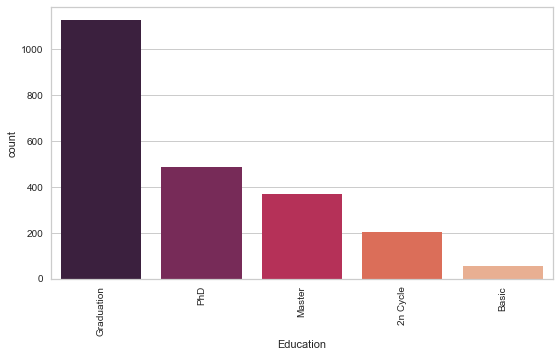

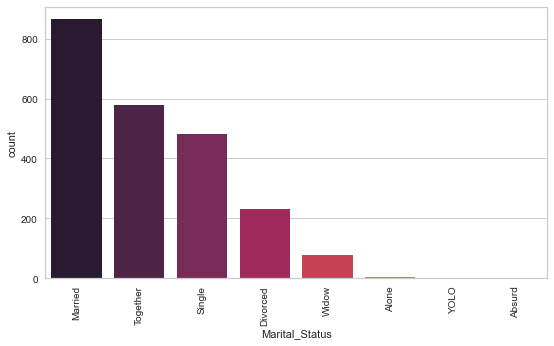

In [7]:
cat_variables = ['Education', 'Marital_Status']
for i in cat_variables:
    figure_size = (9,5)
    figure,axis = plt.subplots(figsize= figure_size)
    sns.countplot(x=i, data=df ,ax=axis, order=df[i].value_counts().index, palette='rocket')
    plt.xticks(rotation=90)
    plt.show();

## Data Preprocessing - Feature Engineering

### Checking Missing or Duplicated Values and Dealing with Those

In [8]:
df.isnull().values.any() # There are missing values.

True

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [11]:
df.isnull().values.any() # No more missing values.

False

In [12]:
df.duplicated().any() # There are duplicated values.

False

In [13]:
df.drop_duplicates(keep="last", inplace=True)

In [14]:
df.duplicated().any() # No more duplication.

False

### Creating 'Age' Feature

In [15]:
df['Age'] = 2024 - df['Year_Birth']

In [16]:
df[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2240.0,55.194196,11.984069,28.0,47.0,54.0,65.0,131.0


In [17]:
len(df[df['Age'] > 80])

12

In [18]:
df.drop(df[df['Age'] > 80].index, inplace = True)

### Feature Engineering for 'Dt_Customer'

In [19]:
# df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64')
# df['Customer_Year_in_Company'] = df['Dt_Customer'].dt.year
# df[['Customer_Year_in_Company']].describe().T

### Dropping Unnecessary Features
* ID columns contains unique values.
* Z_Revenue feature only contains 11 value, must be dropped.
* Z_CostContact	feature only contains 3 valu, must be dropped.
* Year_Birth must be dropped after creating "Age" feature.
* Dt_Customer in terms of year only contains 2012, 2013 and 2014. Not distinctive information, should be dropped.

In [20]:
df.drop(columns=['ID','Z_Revenue','Year_Birth','Dt_Customer','Z_CostContact'],axis=1,inplace=True)

### Dropping Highly Correlated Features

In [21]:
print("The original dataframe has {} columns and {} rows.".format(df.shape[1],df.shape[0]))
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))
triange_df = corr_matrix.mask(mask)
to_drop_features = [columns for columns in triange_df if any(triange_df[columns] > 0.7)]
reduced_df_minmax = df.drop(to_drop_features, axis=1)
print("The reduced dataframe has {} columns and {} rows.".format(reduced_df_minmax.shape[1],reduced_df_minmax.shape[0]))

The original dataframe has 25 columns and 2228 rows.
The reduced dataframe has 24 columns and 2228 rows.


### Feature Engineering for 'Marital_Status'

In [22]:
reduced_df_minmax['Marital_Status'] = np.where(reduced_df_minmax['Marital_Status'].str.contains("Divorced|Widow"),
                                        'Seperated',reduced_df_minmax['Marital_Status'])

reduced_df_minmax['Marital_Status'] = np.where(reduced_df_minmax['Marital_Status'].str.contains("Single|Alone|YOLO|Absurd"),
                                        'Singles',reduced_df_minmax['Marital_Status'])

In [23]:
reduced_df_minmax['Marital_Status'].value_counts()

Married      861
Together     579
Singles      484
Seperated    304
Name: Marital_Status, dtype: int64

### Scaling Numerical Features

In [24]:
reduced_df_robust = reduced_df_minmax.copy()
reduced_df_standard = reduced_df_minmax.copy()

In [25]:
reduced_df_minmax.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age'],
      dtype='object')

In [26]:
transformer = MinMaxScaler()

def scaling(columns):
    return transformer.fit_transform(reduced_df_minmax[columns].values.reshape(-1,1))

columns_to_be_scaled =['Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age']

for i in columns_to_be_scaled:
    reduced_df_minmax[i] = scaling(i)
    
reduced_df_minmax.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Singles,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.664093,0.334601,0.243094,0.200000,0.296296,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.750000
1,Graduation,Singles,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.007722,0.003802,0.016575,0.133333,0.037037,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.807692
2,Graduation,Together,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.428571,0.079848,0.116022,0.066667,0.296296,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596154
3,Graduation,Together,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.038610,0.011407,0.013812,0.133333,0.074074,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769
4,PhD,Married,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.177606,0.102662,0.041436,0.333333,0.185185,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288462


### One-Hot Encoding

In [27]:
df_one_hot = OneHotEncoder(cols=['Education','Marital_Status'],use_cat_names=True).fit_transform(reduced_df_minmax)
df_one_hot.head()

,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Singles,Marital_Status_Together,Marital_Status_Married,Marital_Status_Seperated,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,1,0,0,0,0,1,0,0,0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.664093,0.334601,0.243094,0.200000,0.296296,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.750000
1,1,0,0,0,0,1,0,0,0,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.007722,0.003802,0.016575,0.133333,0.037037,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.807692
2,1,0,0,0,0,0,1,0,0,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.428571,0.079848,0.116022,0.066667,0.296296,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596154
3,1,0,0,0,0,0,1,0,0,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.038610,0.011407,0.013812,0.133333,0.074074,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769
4,0,1,0,0,0,0,0,1,0,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.177606,0.102662,0.041436,0.333333,0.185185,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288462


## K-Means RobustScaler vs MinMaxScaler

In [36]:
transformer = RobustScaler()

def scaling(columns):
    return transformer.fit_transform(reduced_df_robust[columns].values.reshape(-1,1))

columns_to_be_scaled =['Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age']

for i in columns_to_be_scaled:
    reduced_df_robust[i] = scaling(i)
    
reduced_df_robust.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Singles,0.205573,0.0,0.0,0.18,0.964006,2.50000,3.478261,2.50000,1.361702,0.5,1.00,2.00,-0.2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.722222
1,Graduation,Singles,-0.153270,1.0,1.0,-0.22,-0.338028,-0.21875,-0.217391,-0.21875,-0.382979,0.0,-0.75,-0.25,-0.6,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.888889
2,Graduation,Together,0.615561,0.0,0.0,-0.46,0.527908,1.28125,2.152174,0.40625,0.382979,-0.5,1.00,0.00,1.0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277778
3,Graduation,Together,-0.752600,1.0,0.0,-0.46,-0.338028,-0.12500,-0.043478,-0.15625,-0.404255,0.0,-0.50,-0.50,-0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.777778
4,PhD,Married,0.210289,1.0,0.0,0.90,0.000000,1.09375,0.739130,0.59375,-0.191489,1.5,0.25,0.25,0.2,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.611111


In [37]:
transformer = StandardScaler()

def scaling(columns):
    return transformer.fit_transform(reduced_df_standard[columns].values.reshape(-1,1))

columns_to_be_scaled =['Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age']

for i in columns_to_be_scaled:
    reduced_df_standard[i] = scaling(i)
    
reduced_df_standard.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Singles,0.237634,-0.828194,-0.933738,0.309543,0.990165,1.554687,2.475009,1.476581,0.844496,0.345667,1.410401,2.521664,-0.550169,0.690297,-0.279089,-0.284655,-0.277216,-0.262865,-0.116828,-0.092743,2.393975,1.035130
1,Graduation,Singles,-0.232987,1.028161,0.902421,-0.380774,-0.868554,-0.635850,-0.647462,-0.630711,-0.729434,-0.171209,-1.108103,-0.566050,-1.166292,-0.134579,-0.279089,-0.284655,-0.277216,-0.262865,-0.116828,-0.092743,-0.417715,1.293728
2,Graduation,Together,0.775331,-0.828194,-0.933738,-0.794965,0.367614,0.572722,1.354593,-0.146276,-0.038440,-0.688085,1.410401,-0.222971,1.298200,-0.547017,-0.279089,-0.284655,-0.277216,-0.262865,-0.116828,-0.092743,-0.417715,0.345533
3,Graduation,Together,-1.019003,1.028161,-0.933738,-0.794965,-0.868554,-0.560314,-0.500522,-0.582268,-0.748628,-0.171209,-0.748317,-0.909129,-0.550169,0.277859,-0.279089,-0.284655,-0.277216,-0.262865,-0.116828,-0.092743,-0.417715,-1.292258
4,PhD,Married,0.243819,1.028161,-0.933738,1.552113,-0.386002,0.421651,0.160707,-0.000946,-0.556686,1.379419,0.331042,0.120109,0.065954,-0.134579,-0.279089,-0.284655,-0.277216,-0.262865,-0.116828,-0.092743,-0.417715,-1.033659


In [38]:
df_one_hot_robust = OneHotEncoder(cols=['Education','Marital_Status'],use_cat_names=True).fit_transform(reduced_df_robust)
df_one_hot_robust.head()

,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Singles,Marital_Status_Together,Marital_Status_Married,Marital_Status_Seperated,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,1,0,0,0,0,1,0,0,0,0.205573,0.0,0.0,0.18,0.964006,2.50000,3.478261,2.50000,1.361702,0.5,1.00,2.00,-0.2,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.722222
1,1,0,0,0,0,1,0,0,0,-0.153270,1.0,1.0,-0.22,-0.338028,-0.21875,-0.217391,-0.21875,-0.382979,0.0,-0.75,-0.25,-0.6,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.888889
2,1,0,0,0,0,0,1,0,0,0.615561,0.0,0.0,-0.46,0.527908,1.28125,2.152174,0.40625,0.382979,-0.5,1.00,0.00,1.0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277778
3,1,0,0,0,0,0,1,0,0,-0.752600,1.0,0.0,-0.46,-0.338028,-0.12500,-0.043478,-0.15625,-0.404255,0.0,-0.50,-0.50,-0.2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.777778
4,0,1,0,0,0,0,0,1,0,0.210289,1.0,0.0,0.90,0.000000,1.09375,0.739130,0.59375,-0.191489,1.5,0.25,0.25,0.2,-0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.611111


In [39]:
df_one_hot_standard = OneHotEncoder(cols=['Education','Marital_Status'],use_cat_names=True).fit_transform(reduced_df_standard)
df_one_hot_standard.head()

,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Singles,Marital_Status_Together,Marital_Status_Married,Marital_Status_Seperated,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,1,0,0,0,0,1,0,0,0,0.237634,-0.828194,-0.933738,0.309543,0.990165,1.554687,2.475009,1.476581,0.844496,0.345667,1.410401,2.521664,-0.550169,0.690297,-0.279089,-0.284655,-0.277216,-0.262865,-0.116828,-0.092743,2.393975,1.035130
1,1,0,0,0,0,1,0,0,0,-0.232987,1.028161,0.902421,-0.380774,-0.868554,-0.635850,-0.647462,-0.630711,-0.729434,-0.171209,-1.108103,-0.566050,-1.166292,-0.134579,-0.279089,-0.284655,-0.277216,-0.262865,-0.116828,-0.092743,-0.417715,1.293728
2,1,0,0,0,0,0,1,0,0,0.775331,-0.828194,-0.933738,-0.794965,0.367614,0.572722,1.354593,-0.146276,-0.038440,-0.688085,1.410401,-0.222971,1.298200,-0.547017,-0.279089,-0.284655,-0.277216,-0.262865,-0.116828,-0.092743,-0.417715,0.345533
3,1,0,0,0,0,0,1,0,0,-1.019003,1.028161,-0.933738,-0.794965,-0.868554,-0.560314,-0.500522,-0.582268,-0.748628,-0.171209,-0.748317,-0.909129,-0.550169,0.277859,-0.279089,-0.284655,-0.277216,-0.262865,-0.116828,-0.092743,-0.417715,-1.292258
4,0,1,0,0,0,0,0,1,0,0.243819,1.028161,-0.933738,1.552113,-0.386002,0.421651,0.160707,-0.000946,-0.556686,1.379419,0.331042,0.120109,0.065954,-0.134579,-0.279089,-0.284655,-0.277216,-0.262865,-0.116828,-0.092743,-0.417715,-1.033659


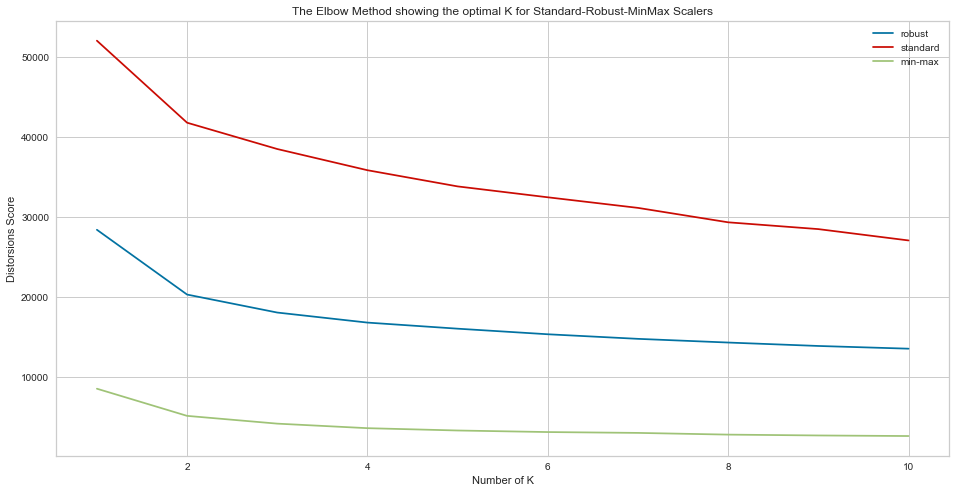

In [42]:
distorsions_robust = []
distorsions_standard =[]
distorsions_minmax =[]

k_number = range(1,11)
for k in k_number:
    km = KMeans(n_clusters=k,random_state=123)
    km.fit(df_one_hot_robust)
    distorsions_robust.append(km.inertia_)
    km.fit(df_one_hot_standard)
    distorsions_standard.append(km.inertia_)
    km.fit(df_one_hot)
    distorsions_minmax.append(km.inertia_)

plt.figure(figsize=(16,8))
plt.plot(k_number, distorsions_robust, 'bx-', label='robust')
plt.plot(k_number, distorsions_standard,'rx-', label='standard')
plt.plot(k_number, distorsions_minmax,'gx-', label='min-max')
plt.legend()
plt.xlabel('Number of K')
plt.ylabel('Distorsions Score')
plt.title('The Elbow Method showing the optimal K for Standard-Robust-MinMax Scalers')
plt.show()

## K-Means Clustering

In [28]:
kmeans = KMeans(random_state = 123)
predictions = kmeans.fit_predict(df_one_hot)
predictions[0:15]

array([1, 1, 7, 7, 3, 2, 5, 3, 2, 2, 0, 6, 5, 5, 0])

In [29]:
for n_clusters in [3,4,5,6,7,8]:
    clusters = KMeans(n_clusters = n_clusters, random_state = 123)
    label_predictions = clusters.fit_predict(df_one_hot)
    score = silhouette_score(df_one_hot, label_predictions)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 3, silhouette score is 0.19319930265009164
For n_clusters = 4, silhouette score is 0.23173530003263687
For n_clusters = 5, silhouette score is 0.19533331984031146
For n_clusters = 6, silhouette score is 0.20526592567922947
For n_clusters = 7, silhouette score is 0.21527294859635723
For n_clusters = 8, silhouette score is 0.23420660691634093


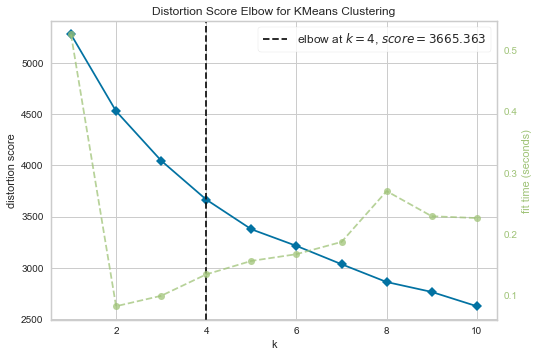

In [30]:
kmeans_visualizer = KMeans(random_state=123)
kmeans_visualizer_elbow = KElbowVisualizer(kmeans_visualizer, k=(1,11))
kmeans_visualizer_elbow.fit(df_one_hot)
kmeans_visualizer_elbow.show();

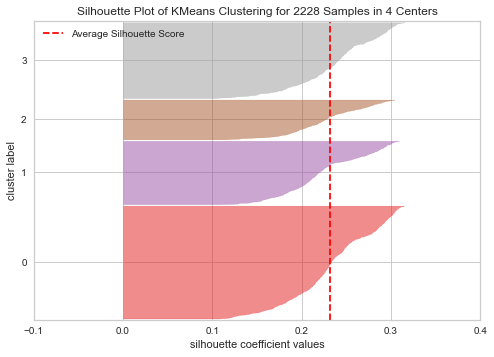

In [31]:
visualizer = SilhouetteVisualizer(KMeans(n_clusters = 4, random_state=123))
visualizer.fit(df_one_hot)
visualizer.show();

In [32]:
kmeans_cluster_4 = KMeans(n_clusters=4, random_state=123)
labels_kmeans = kmeans_cluster_4.fit_predict(df_one_hot)
labels_kmeans[0:10]

array([1, 1, 3, 3, 0, 3, 2, 0, 3, 3])

In [33]:
df_one_hot['K_Means_Segments'] = labels_kmeans
df_one_hot.head()

,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Singles,Marital_Status_Together,Marital_Status_Married,Marital_Status_Seperated,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,K_Means_Segments
0,1,0,0,0,0,1,0,0,0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.664093,0.334601,0.243094,0.200000,0.296296,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.750000,1
1,1,0,0,0,0,1,0,0,0,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.007722,0.003802,0.016575,0.133333,0.037037,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.807692,1
2,1,0,0,0,0,0,1,0,0,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.428571,0.079848,0.116022,0.066667,0.296296,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.596154,3
3,1,0,0,0,0,0,1,0,0,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.038610,0.011407,0.013812,0.133333,0.074074,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,3
4,0,1,0,0,0,0,0,1,0,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.177606,0.102662,0.041436,0.333333,0.185185,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288462,0


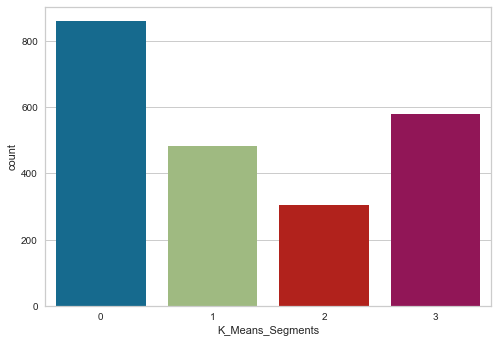

In [34]:
sns.countplot(data=df_one_hot, x='K_Means_Segments');

In [35]:
cluster_profile = df_one_hot.groupby('K_Means_Segments').mean()
cluster_profile['count_of_samples'] = (df_one_hot.groupby('K_Means_Segments')['Income'].count().values)
cluster_profile.style.highlight_max(color='lightgreen', axis=0)

,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Singles,Marital_Status_Together,Marital_Status_Married,Marital_Status_Seperated,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,count_of_samples
K_Means_Segments,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.502904,0.220674,0.159117,0.023229,0.094077,0.000000,0.000000,1.000000,0.000000,0.075046,0.228804,0.256678,0.486831,0.199424,0.129428,0.135826,0.101880,0.118576,0.159892,0.151288,0.093330,0.449835,0.268873,0.073171,0.073171,0.075494,0.073171,0.008130,0.008130,0.113821,0.506254,861
1,0.524793,0.206612,0.157025,0.037190,0.074380,1.000000,0.000000,0.000000,0.000000,0.074039,0.233471,0.204545,0.496577,0.192307,0.135336,0.148776,0.102976,0.122837,0.143939,0.144169,0.093049,0.433090,0.264669,0.080579,0.068182,0.064050,0.066116,0.010331,0.012397,0.225207,0.465273,484
2,0.506579,0.240132,0.157895,0.006579,0.088816,0.000000,0.000000,0.000000,1.000000,0.078323,0.185855,0.305921,0.495946,0.223944,0.144191,0.146617,0.112292,0.134896,0.161623,0.161550,0.099507,0.457490,0.267270,0.072368,0.092105,0.065789,0.055921,0.019737,0.003289,0.210526,0.599127,304
3,0.493955,0.200345,0.183074,0.024180,0.098446,0.000000,1.000000,0.000000,0.000000,0.077362,0.225389,0.265112,0.506376,0.204991,0.126357,0.150112,0.099076,0.117907,0.155095,0.151155,0.095361,0.441477,0.263385,0.063903,0.074266,0.074266,0.055268,0.020725,0.008636,0.103627,0.541052,579


## Hiearchical Clustering

In [53]:
df_one_hot_sample = df_one_hot.sample(n=100) #frac=0.1 takes 10% of the samples randomly
df_one_hot_sample.head()

,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Singles,Marital_Status_Together,Marital_Status_Married,Marital_Status_Seperated,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,K_Means_Segments
1390,0,0,1,0,0,0,0,1,0,0.078250,0.5,0.5,0.070707,0.105827,0.000000,0.050193,0.026616,0.196133,0.400000,0.148148,0.142857,0.230769,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461538,0
1516,1,0,0,0,0,0,0,1,0,0.081254,0.0,0.5,0.848485,0.452110,0.000000,0.038610,0.026616,0.212707,0.333333,0.370370,0.107143,0.615385,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.653846,0
1941,1,0,0,0,0,0,1,0,0,0.039989,0.0,0.5,0.686869,0.012726,0.005025,0.011583,0.007605,0.011050,0.066667,0.037037,0.000000,0.230769,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.884615,3
2236,0,1,0,0,0,0,1,0,0,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.000000,0.000000,0.022099,0.466667,0.296296,0.071429,0.384615,0.35,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.961538,3
198,1,0,0,0,0,0,0,1,0,0.127814,0.0,0.0,0.202020,0.230409,0.949749,0.193050,0.125475,0.475138,0.066667,0.185185,0.214286,0.384615,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.807692,0


In [54]:
hc_complete = linkage(df_one_hot_sample, method="complete")
hc_average = linkage(df_one_hot_sample, method="average")
hc_single = linkage(df_one_hot_sample, method="single")
hc_wards = linkage(df_one_hot_sample, method="ward")

In [63]:
hc_complete_euclidean = linkage(df_one_hot_sample, method="complete", metric='euclidean')
hc_complete_minkowski = linkage(df_one_hot_sample, method="complete", metric="minkowski")

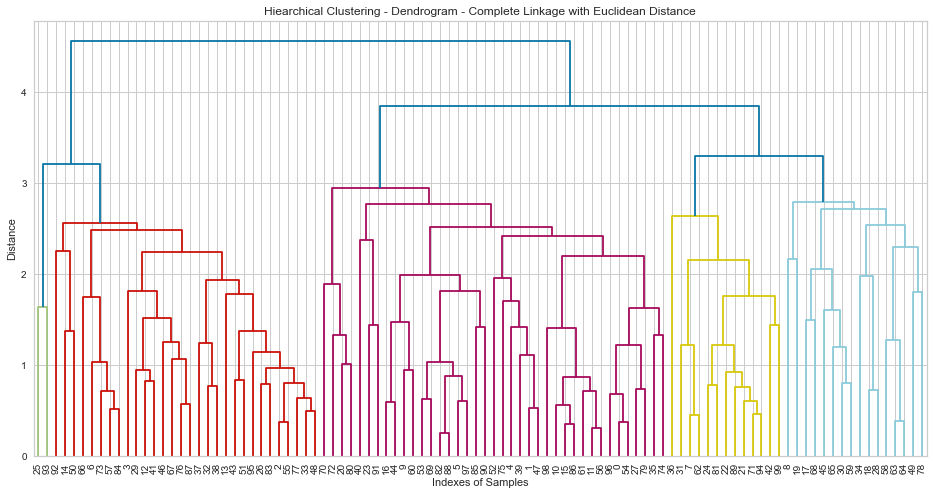

In [64]:
plt.figure(figsize=(16,8))
plt.title('Hiearchical Clustering - Dendrogram - Complete Linkage with Euclidean Distance')
plt.xlabel('Indexes of Samples')
plt.ylabel('Distance')
dendrogram(hc_complete_euclidean,leaf_font_size=10);

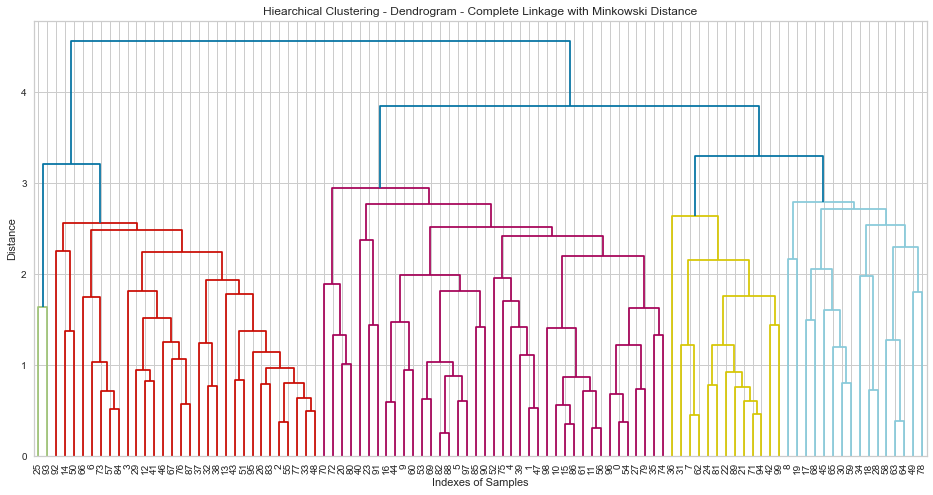

In [72]:
plt.figure(figsize=(16,8))
plt.title('Hiearchical Clustering - Dendrogram - Complete Linkage with Minkowski Distance')
plt.xlabel('Indexes of Samples')
plt.ylabel('Distance')
dendrogram(hc_complete_minkowski,leaf_font_size=10);

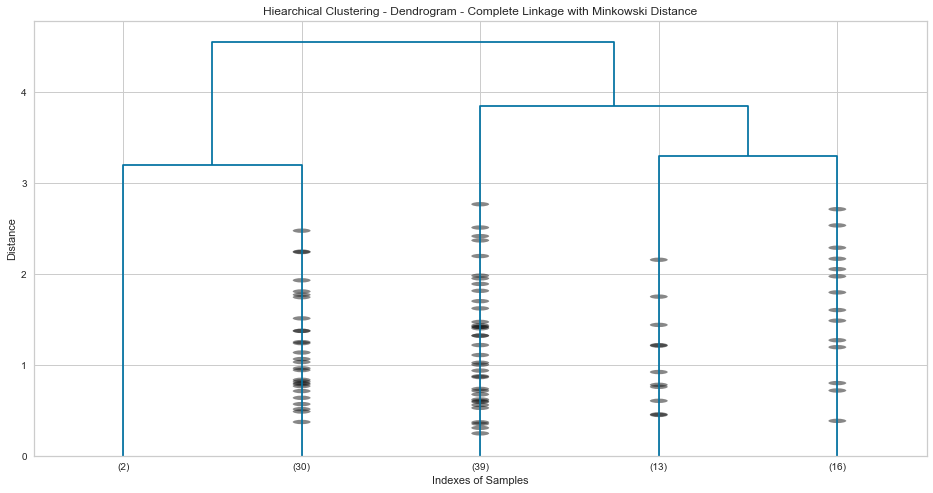

In [77]:
plt.figure(figsize=(16,8))
plt.title('Hiearchical Clustering - Dendrogram - Complete Linkage with Minkowski Distance')
plt.xlabel('Indexes of Samples')
plt.ylabel('Distance')
dendrogram(hc_complete_minkowski,leaf_font_size=10, truncate_mode='lastp', p=5, show_contracted=True);

In [67]:
cluster_hiearchical = AgglomerativeClustering(n_clusters=5, 
                                              affinity='euclidean', 
                                              linkage='complete')
labels_hiearchical = cluster_hiearchical.fit_predict(df_one_hot)
labels_hiearchical[0:10]

array([0, 0, 2, 2, 1, 2, 4, 1, 2, 2], dtype=int64)

In [70]:
df_one_hot['Hiearchical_Segments'] = labels_hiearchical
df_one_hot[['K_Means_Segments','Hiearchical_Segments']].head(15)

,K_Means_Segments,Hiearchical_Segments
0,1,0
1,1,0
2,3,2
3,3,2
4,0,1
5,3,2
6,2,4
7,0,1
8,3,2
9,3,2


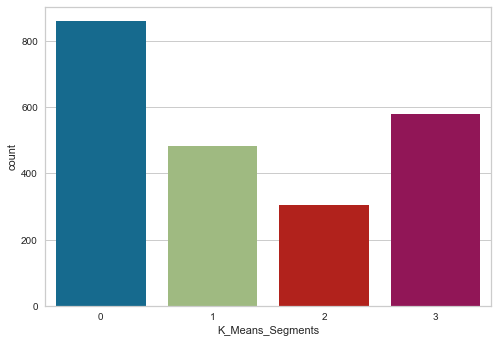

In [73]:
sns.countplot(data=df_one_hot, x='K_Means_Segments');

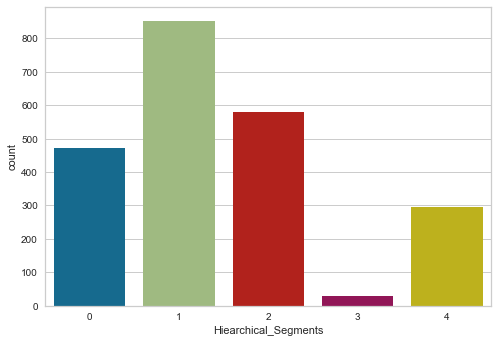

In [74]:
sns.countplot(data=df_one_hot, x='Hiearchical_Segments');

In [75]:
cluster_profile = df_one_hot.groupby('Hiearchical_Segments').mean()
cluster_profile['count_of_samples_hiearchical'] = (df_one_hot.groupby('Hiearchical_Segments')['Income'].count().values)
cluster_profile.style.highlight_max(color='lightgreen', axis=0)

,Education_Graduation,Education_PhD,Education_Master,Education_Basic,Education_2n Cycle,Marital_Status_Singles,Marital_Status_Together,Marital_Status_Married,Marital_Status_Seperated,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,K_Means_Segments,count_of_samples_hiearchical
Hiearchical_Segments,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.494715,0.230444,0.160677,0.038055,0.076110,0.980973,0.000000,0.019027,0.000000,0.072648,0.238901,0.209302,0.492921,0.183533,0.124502,0.141061,0.097236,0.121103,0.146018,0.142667,0.089625,0.426086,0.268499,0.078224,0.063425,0.044397,0.065539,0.010571,0.012685,0.215645,0.469548,0.980973,473
1,0.508216,0.212441,0.160798,0.023474,0.095070,0.000000,0.000000,1.000000,0.000000,0.074673,0.231221,0.258216,0.487646,0.196300,0.129344,0.135557,0.101649,0.118061,0.160563,0.150539,0.092094,0.448899,0.269718,0.071596,0.068075,0.069249,0.063380,0.007042,0.008216,0.104460,0.506501,0.000000,852
2,0.493955,0.200345,0.183074,0.024180,0.098446,0.000000,1.000000,0.000000,0.000000,0.077362,0.225389,0.265112,0.506376,0.204991,0.126357,0.150112,0.099076,0.117907,0.155095,0.151155,0.095361,0.441477,0.263385,0.063903,0.074266,0.074266,0.055268,0.020725,0.008636,0.103627,0.541052,3.000000,579
3,1.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000,0.285714,0.123131,0.000000,0.035714,0.516955,0.530045,0.434853,0.355350,0.285035,0.210339,0.066667,0.205026,0.239796,0.626374,0.126786,0.285714,0.392857,0.785714,0.642857,0.107143,0.000000,0.857143,0.431319,1.285714,28
4,0.493243,0.246622,0.162162,0.006757,0.091216,0.000000,0.000000,0.000000,1.000000,0.077122,0.190878,0.314189,0.497202,0.216078,0.133471,0.139727,0.105128,0.131066,0.164640,0.161036,0.094836,0.454262,0.271959,0.060811,0.084459,0.047297,0.030405,0.013514,0.003378,0.189189,0.599662,2.000000,296
